In [1]:
(require '[clojupyter.misc.helper :as helper])
(helper/add-dependencies '[incanter "1.5.7"])
(helper/add-dependencies '[thi.ng/geom "1.0.0-RC4"])

{[thi.ng/geom "1.0.0-RC4"] #{[thi.ng/math "0.3.0"] [thi.ng/xerror "0.1.0"] [thi.ng/dstruct "0.2.1"] [cljs-log "0.2.2"] [thi.ng/ndarray "0.3.2"] [thi.ng/typedarrays "0.1.6"] [thi.ng/strf "0.2.2"] [org.clojure/clojure "1.9.0"] [thi.ng/shadergraph "0.3.0"] [hiccup "1.0.5"] [org.clojure/clojurescript "1.10.238"] [org.jogamp.gluegen/gluegen-rt "2.3.2"] [thi.ng/color "1.4.0"] [org.jogamp.jogl/jogl-all "2.3.2"]}, [com.fasterxml.jackson.core/jackson-core "2.8.7"] nil, [thi.ng/math "0.3.0"] nil, [org.msgpack/msgpack "0.6.12"] #{[com.googlecode.json-simple/json-simple "1.1.1" :exclusions [[junit]]] [org.javassist/javassist "3.18.1-GA"]}, [thi.ng/xerror "0.1.0"] nil, [com.postspectacular/dependency "0.1.2"] nil, [thi.ng/dstruct "0.2.1"] nil, [cljs-log "0.2.2"] #{[environ "1.0.0"]}, [org.clojure/google-closure-library "0.0-20170809-b9c14c6b"] #{[org.clojure/google-closure-library-third-party "0.0-20170809-b9c14c6b"]}, [com.google.code.gson/gson "2.7"] nil, [org.codehaus.mojo/animal-sniffer-annotat

In [39]:
;import incanter
(use '(incanter core charts stats latex svg sqrt))

;import geometry viz tool
(require
  '[thi.ng.geom.line :as l]
  '[thi.ng.geom.utils.intersect]
  '[thi.ng.geom.circle]
  '[thi.ng.geom.polygon :as p]
  '[thi.ng.geom.rect :as r]
  '[thi.ng.geom.core :as g])

Execution error (FileNotFoundException) at user/eval24750 (REPL:2).
Could not locate incanter/sqrt__init.class, incanter/sqrt.clj or incanter/sqrt.cljc on classpath.


class java.io.FileNotFoundException: 

### 1. Plot charts with math equation as inputs

let say we want to plot a Probability Density Function:

$$f(x)=\frac{1}{\sqrt{2\pi \sigma^2}} e^{\frac{-(x - \mu)^2}{2 \sigma^2}}$$

the LaTex syntax would be:
```latex
f(x)=\frac{1}{\sqrt{2\pi \sigma^2}} e^{\frac{-(x - \mu)^2}{2 \sigma^2}}
```

However, in Clojure, for every `\` you will need to add another `\` so that the IDE can read the input equation as above. This is because a single `\` by default would be detected as an escape sequence.

The proper way to write the above LaTex syntax is as follows:

```latex
f(x)=\\frac{1}{\\sqrt{2\pi \\sigma^2}} e^{\\frac{-(x - \\mu)^2}{2 \\sigma^2}}
```

about incanter's mechanism:

>  Incanter simply wraps the Java charting library JFreeChart, we can call (.createBufferedImage chart width height) on any Incanter chart to get an image we can render

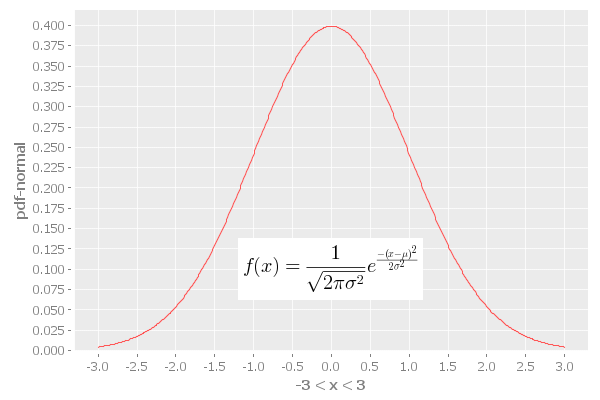

In [6]:
(-> (function-plot pdf-normal -3 3)
      (add-latex 0 0.1 "f(x)=\\frac{1}{\\sqrt{2\\pi \\sigma^2}} e^{\\frac{-(x - \\mu)^2}{2 \\sigma^2}}")
      (.createBufferedImage 600 400))

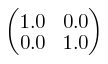

In [9]:
(latex (to-latex (matrix [[1 0][0 1]])))

## 2. Using incanter with `thi.ng/geom` library

incanter arguments
1. `set-theme-bw`
2. `add-parametric`
3. `add-polygon`
4. `add-points`
5. `add-polygon`
6. `add-points`
7. `set-stroke`
8. `set-stroke-color`

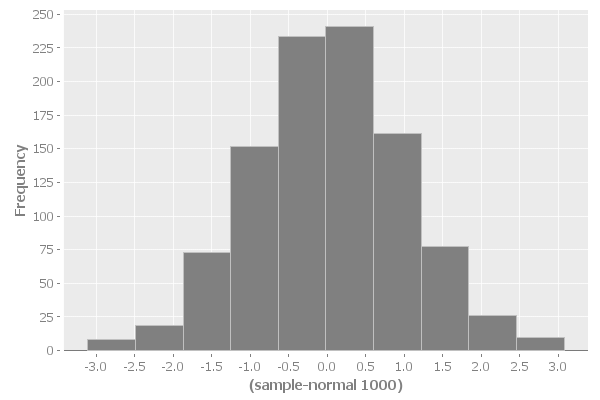

In [16]:
;histogram
(-> (histogram (sample-normal 1000))
    (.createBufferedImage 600 400))

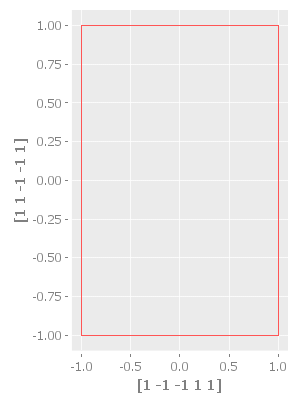

In [19]:
; add parametric demo
(-> (xy-plot [1 -1 -1 1 1] [1 1 -1 -1 1] :auto-sort false)
        (.createBufferedImage 300 400))

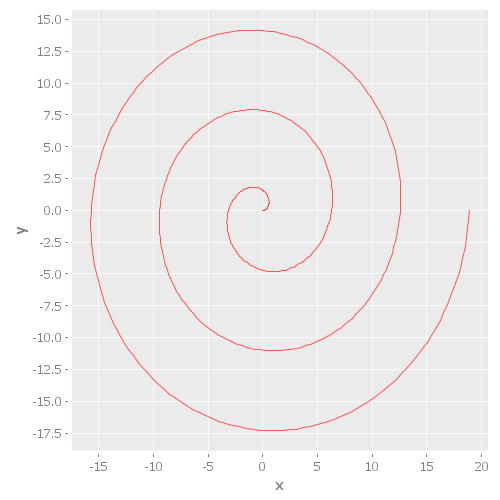

In [37]:
(defn spiral
    [t]
    [(* t (cos t)) (* t (sin t))])
(-> (parametric-plot spiral 0 (* 6 Math/PI) :x-label "x" :y-label "y")
    (.createBufferedImage 500 500))

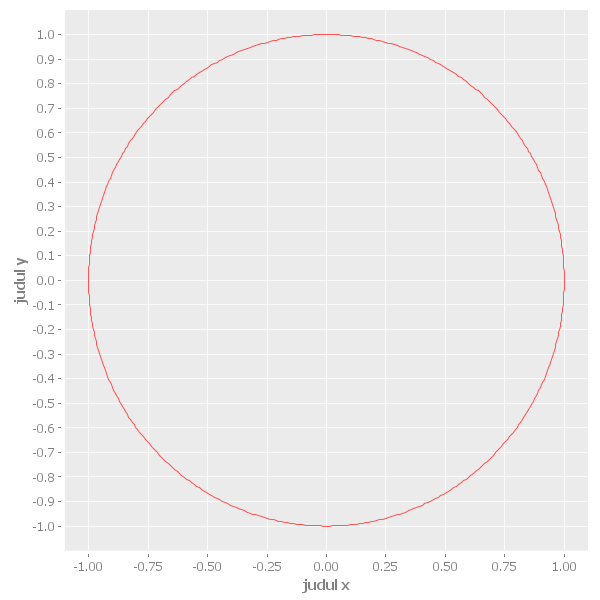

In [35]:
(defn circle [t] [(cos t) (sin t)])
(-> (parametric-plot circle 0 (* 2 Math/PI) :x-label "judul x" :y-label "judul y")
    (.createBufferedImage 600 600))

In [25]:
(defn circle [t] [(cos t) (sin t)])
(doto (xy-plot [1 -1 -1 1 1] [1 1 -1 -1 1] :auto-sort false)
    (add-parametric circle 0 (* 2 Math/PI))
    (view))

#object[org.jfree.chart.JFreeChart 0x613e12c5 "org.jfree.chart.JFreeChart@613e12c5"]

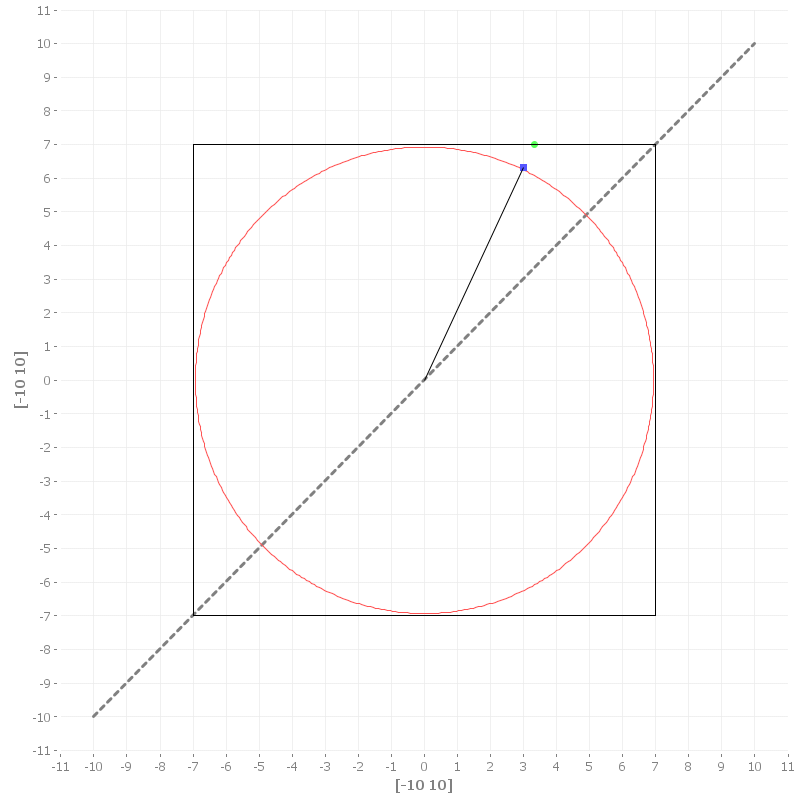

In [12]:
(let [R      7
      S      (* 2 R)
      p1     [[R R] [(- R) R] [(- R) (- R)] [R (- R)]]
      r1     (r/rect (- R) (- R) S S)

      circle (fn [c] (fn [t] [(* (:r c) (cos t)) (* (:r c) (sin t))]))
      c1     (g/bounding-circle (p/polygon2 p1))
      c2     (g/scale-size c1 0.7)
      x      3
      y      (Math/sqrt (- (* R R) (* x x)))
      l1     (l/line2 0 0 x y)
      l2     (g/scale l1 2)
      [x' y'] (g/intersect-line r1 l2)]

  (-> (doto (xy-plot [-10 10] [-10 10])
    (set-theme-bw )
    (add-parametric (circle c2) (- Math/PI) Math/PI)
    (add-polygon (:points (g/as-polygon r1)))
    (add-points x y)
    (add-polygon (:points l1))
    (add-points x' y')
    (set-stroke :width 3 :dash 5)
    (set-stroke-color java.awt.Color/gray))
    (.createBufferedImage 800 800)))

In [1]:
(require `[incanter.core   :refer [sqrt sq view]]
         `[incanter.charts :refer [function-plot
                                  add-points
                                  add-text
                                  set-x-label
                                  set-y-label
                                  set-y-range
                                  xy-plot]])

(defn in-circle? [point]
  (let [[x y] point]
    (if (<= (+ (sq x)
               (sq y))
            1.0)
      true
      false)))

(defn outside-circle? [point]
  (not (in-circle? point)))

(defn generate-random-point []
  [(rand) (rand)])

(defn generate-random-points [n]
  (take n (repeatedly generate-random-point)))

(defn points-in-circle [points]
  (filter in-circle? points))

(defn sort-points [points]
  {:inside  (filter in-circle? points)
   :outside (filter outside-circle? points)})

(defn point-ratio [points]
  (float (/ (count (points-in-circle points))
            (count points))))

(defn estimate-pi [points]
  (* 4 (point-ratio points)))

(defn circle [x] (sqrt (- 1.0 (sq x))))

(defn draw-circle []
  (function-plot circle 0 1)) 

(defn plot-points [chart points label]
  (let [xs (map first  points)
        ys (map second points)]
    (add-points chart xs ys :series-label label)))

(defn generate-and-sort-points [n]
  (sort-points (generate-random-points n)))

(defn label [point]
  (if (in-circle? point)
    "inside"
    "outside"))

(defn make-plot [n]
  (let [points (generate-random-points n)
        sorted (sort-points points)]
    (doto (draw-circle)
      (set-y-range -0.25 1)
      (plot-points (:inside  sorted) "inside")
      (plot-points (:outside sorted) "outside")
      (set-x-label "")
      (set-y-label "")
      (add-text 0.10 -0.10 (str "Total: "
                                (count points)))
      (add-text 0.10 -0.05 (str "Inside: "
                                (count (:inside sorted))))
      (add-text 0.10 -0.15 (str "Ratio: "
                                (point-ratio points)))
      (add-text 0.10 -0.20 (str "Pi: "
                                (format "%4f" (estimate-pi points))))
      (view :width 500 :height 600))))

(defn -main [& args]
 (make-plot 100000))

Execution error (FileNotFoundException) at user/eval4096 (REPL:1).
Could not locate incanter/core__init.class, incanter/core.clj or incanter/core.cljc on classpath.
Syntax error compiling at (REPL:12:16).
Unable to resolve symbol: sq in this context
Syntax error compiling at (REPL:41:18).
Unable to resolve symbol: sqrt in this context
Syntax error compiling at (REPL:44:3).
Unable to resolve symbol: function-plot in this context
Syntax error compiling at (REPL:49:5).
Unable to resolve symbol: add-points in this context
Syntax error compiling at (REPL:63:7).
Unable to resolve symbol: set-y-range in this context


class clojure.lang.Compiler$CompilerException: 